In [1]:
!pip install config

In [2]:
import config
import requests

In [3]:
#imports key from config file
nyt_articles_api = config.nyt_articles_api
nyt_books_api = config.nyt_books_api
nyt_movie_api = config.nyt_movie_api 


response = requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=' + nyt_articles_api + '?q=donald+trump')
data = response.json()

ConnectionError: HTTPSConnectionPool(host='api.nytimes.com', port=443): Max retries exceeded with url: /svc/search/v2/articlesearch.json?api-key=a1bd087e082c4da4b0e88a2bbc7cd93a?q=donald+trump (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x10cdcfba8>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [ ]:
data.keys()

In [ ]:
data['response']

In [ ]:
data['response']['docs']

In [ ]:
#for item in data['response']['docs']:
 #   print(item)

In [5]:
import pandas as pd

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/Monica/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [6]:
import numpy as np
social_sites = ["Twitter", "Facebook", "Instagram", "MySpace", "Tumblr", "Snapchat"]
social_df = pd.read_csv("social_hits.csv", encoding='latin-1')
for social in social_sites:
    #start_date = 20000101  
    #end_date = 20001231
    start_date = 20050101  
    end_date = 20051231
    array=[]

    for n in [1,2,3,4,5,6, 7,8,9,10,11]:
        if (n <= 10):
            start_date = start_date + 10000
            #print(start_date)
            end_date = end_date + 10000
            #print(end_date)
        else:
            # start_date = start_date + 100000
            start_date = 20160101
            #print(start_date)
            end_date = 20160730
            #print(end_date)


        response = requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=' + nyt_articles_api + '&q=' + social + '&begin_date=' +  str(start_date)   + '&end_date=' +  str(end_date)+ '&sort=oldest')

        social_data = response.json()  
        social_hits = social_data['response']['meta']['hits']

        start_str = str(start_date)
        start_str = start_str[:4]

        end_str = str(end_date)
        end_str = end_str[:4]
        
        social_df = social_df.append({"year": end_str, "hits": social_hits, "social_site": social}, ignore_index=True)
        #array.append({"year": end_str, "hits": social_hits, "social_site": social})
        print("There were", social_hits, "mentions of", social, "in", end_str)
        #print(array)
    #social_df.append(array)
        



There were 6 mentions of Twitter in 2006
There were 38 mentions of Twitter in 2007
There were 415 mentions of Twitter in 2008
There were 2738 mentions of Twitter in 2009
There were 3752 mentions of Twitter in 2010
There were 6839 mentions of Twitter in 2011
There were 7843 mentions of Twitter in 2012
There were 7134 mentions of Twitter in 2013
There were 13368 mentions of Twitter in 2014
There were 13883 mentions of Twitter in 2015
There were 9533 mentions of Twitter in 2016
There were 117 mentions of Facebook in 2006
There were 553 mentions of Facebook in 2007
There were 961 mentions of Facebook in 2008
There were 2249 mentions of Facebook in 2009
There were 3287 mentions of Facebook in 2010
There were 5918 mentions of Facebook in 2011
There were 6177 mentions of Facebook in 2012
There were 5057 mentions of Facebook in 2013
There were 8203 mentions of Facebook in 2014
There were 10289 mentions of Facebook in 2015
There were 6790 mentions of Facebook in 2016
There were 0 mentions of In

KeyboardInterrupt: 

In [31]:
import numpy as np
social_sites = ["Twitter", "Facebook", "Instagram", "MySpace", "Tumblr", "Snapchat", "LinkedIn"]
social_df_q = pd.read_csv("social_hits.csv", encoding='latin-1')
for social in social_sites:
    #start_date = 20000101  
    #end_date = 20001231
    start_date = 20050101  
    end_date = 20051231
    #end_date = 20050101
    
 
    array_q=[]

    for year in range(2006, 2016):
        quarters = [
            { 'start': '{}0101'.format(year), 'end': '{}0331'.format(year) },
            { 'start': '{}0401'.format(year), 'end': '{}0630'.format(year) },
            { 'start': '{}0701'.format(year), 'end': '{}0930'.format(year) },
            { 'start': '{}1001'.format(year), 'end': '{}1231'.format(year) }
          ]
            
            #[
            #    { 'start': '20160101', 'end': '20160331' },
            #    { 'start': '20160401', 'end': '20160631'}
            #]
                #20050101 - 20050331
            
                #20050401 - 20050630
                
                #20050701 - 20050930
                
                #20051001 - 20051231
                
        q = 1
            
        for quarter in quarters:
            start_date = quarter['start']
            end_date = quarter['end']
            quart = "Q" + str(q) + " " + str(year) 
            
            q = q + 1
            
           
            response = requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=' + nyt_articles_api + '&q=' + social + '&begin_date=' +  str(start_date)   + '&end_date=' +  str(end_date)+ '&sort=oldest')
            print(response)
            social_data = response.json()  
            social_hits = social_data['response']['meta']['hits']

            start_str = str(start_date)
            start_str = start_str[:4]

            end_str = str(end_date)
            end_str = end_str[:4]
            
            year = end_str
            end_quarter = str(end_date)
            end_quarter = end_quarter[4:]
            
          
            start_quarter = str(start_date)
            start_quarter = start_quarter[4:]
        
            social_df_q = social_df_q.append({"quarter": quart, "year": year, "end_quarter": end_quarter, "start_quarter":start_quarter, "full_startdate" : start_date, "hits": social_hits, "social_site": social}, ignore_index=True)
        #array.append({"year": end_str, "hits": social_hits, "social_site": social})
            print("There were", social_hits, "mentions of", social, "in", end_str, "from", start_quarter, "to", end_quarter)
        #print(array)
    #social_df.append(array)
social_df_q['full_startdate'] = pd.to_datetime(social_df_q['full_startdate'])
social_df_q.to_csv("NYT_Social_hitsByQuarter", sep=',')     

  


<Response [200]>
There were 1 mentions of Twitter in 2006 from 0101 to 0331
<Response [200]>
There were 1 mentions of Twitter in 2006 from 0401 to 0630
<Response [200]>
There were 1 mentions of Twitter in 2006 from 0701 to 0930
<Response [200]>
There were 3 mentions of Twitter in 2006 from 1001 to 1231
<Response [200]>
There were 0 mentions of Twitter in 2007 from 0101 to 0331
<Response [200]>
There were 11 mentions of Twitter in 2007 from 0401 to 0630
<Response [200]>
There were 10 mentions of Twitter in 2007 from 0701 to 0930
<Response [200]>
There were 17 mentions of Twitter in 2007 from 1001 to 1231
<Response [200]>
There were 26 mentions of Twitter in 2008 from 0101 to 0331
<Response [200]>
There were 38 mentions of Twitter in 2008 from 0401 to 0630
<Response [200]>
There were 149 mentions of Twitter in 2008 from 0701 to 0930
<Response [200]>
There were 202 mentions of Twitter in 2008 from 1001 to 1231
<Response [200]>
There were 401 mentions of Twitter in 2009 from 0101 to 0331
<

In [ ]:
# ax = social_df.plot(kind='barh', x='Twitter', y='Index Week', alpha=0.5)

In [ ]:
#social_df.groupby('social_site')['hits'].hist(bins=50)

In [ ]:
social_df_q['full_startdate'] = pd.to_datetime(social_df_q['full_startdate'])

In [ ]:
social_df_q.info()

In [ ]:
social_df.info()

In [ ]:
social_df.head()

In [ ]:
social_df_q.head()

In [ ]:
social_df_q.info()

In [ ]:
# recent_social_df = social_df[social_df['year'] > 2005]

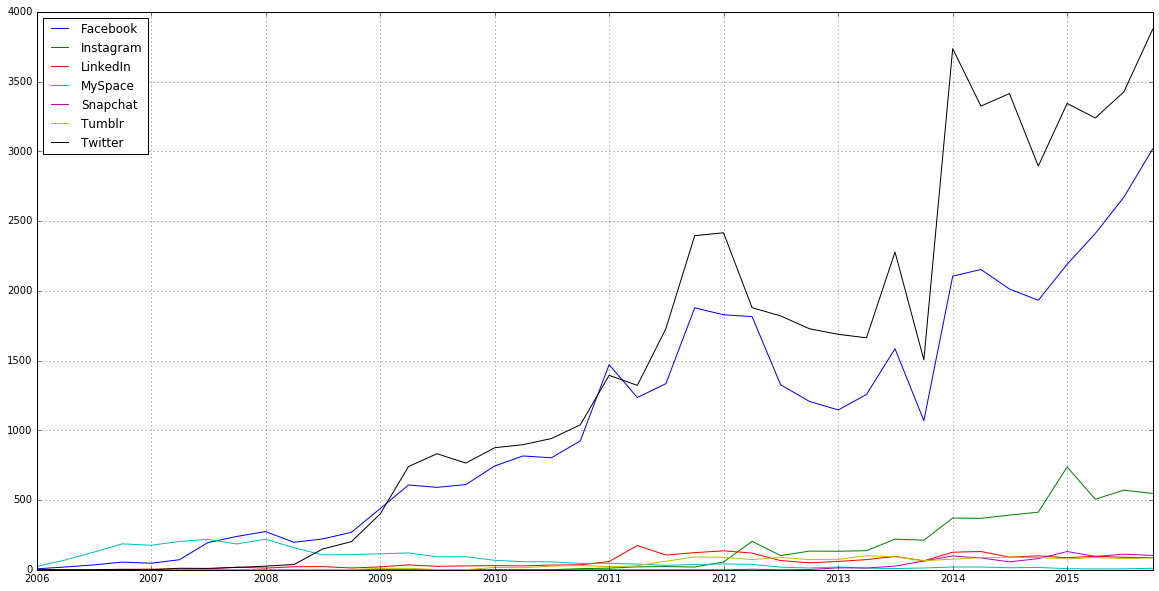

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
for sitename, selection in social_df_q.groupby('social_site'):
    ax.plot(selection['full_startdate'], selection['hits'],label=sitename)
    
ax.legend(loc=2)
plt.grid()
plt.savefig('social_over_timequarterlydata.pdf')

In [ ]:
['full_startdate']

In [ ]:
fig, ax = plt.subplots()
for sitename, selection in social_df.groupby('social_site'):
    ax.plot(selection['year'], selection['hits'],label=sitename)
ax.legend()

In [ ]:
fig, ax = plt.subplots()
for sitename, selection in social_df.groupby('social_site'):
    ax.plot(selection['year'], selection['hits'],label=sitename)
ax.legend(loc=2)
plt.savefig('social_over_time.pdf')

In [ ]:
#s ocial_df.groupby('social_site')['hits'].plot(legend=True,x='year')

In [ ]:
#social_df.groupby('social_site')['hits'].plot(kind="bar",y="year", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
# social_df.groupby('social_site')['hits'].plot()

In [ ]:
#data = response.json()

In [ ]:
social_df.describe()



In [ ]:
#data.keys()

In [ ]:
#data['response']

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#df = pd.read_csv("cleaned_socialmediapopularity.csv", encoding='latin-1')

In [23]:
#df.head

In [24]:
#df.describe()

In [25]:
# df

In [26]:
#df.columns

In [27]:
import datetime

In [ ]:
# df['Week'] = df['Week'].apply(dateutil.parser.parse)

In [ ]:
df.info()

In [ ]:
#df=df.astype(float)

In [ ]:
#df.index = df['Week']

In [ ]:
#df.resample('M').count()

In [ ]:
#ax = df.plot(kind='barh', x='Twitter', y='Index Week', alpha=0.5)

In [ ]:
ax = df.plot(kind='scatter', x='Twitter', y='Index Week', alpha=0.5)
df.plot(kind='scatter', x='Facebook', y='Index Week', alpha=0.5, ax=ax)
df.plot(kind='scatter', x='Snapchat', y='Index Week', alpha=0.5, ax=ax)
df.plot(kind='scatter', x='Instagram', y='Index Week', alpha=0.5, ax=ax)
df.plot(kind='scatter', x='myspace', y='Index Week', alpha=0.5, ax=ax)


In [ ]:
import datetime

In [ ]:
# Asking for TWO subplots, ax1 and ax2.
# Be sure to put them in parenthesis
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,  figsize=(9,9),  sharex=True, sharey=True)

# Use ax1 to plot Bhutan

social_df[social_df['social_site'] == 'Twitter'].plot(x='year', y='hits', legend=False, ax=ax1)
ax1.set_title("Twitter")



social_df[social_df['social_site'] == 'Facebook'].plot(x='year', y='hits', legend=False, ax=ax2)
ax2.set_title("Facebook")


social_df[social_df['social_site'] == 'Instagram'].plot(x='year', y='hits', legend=False, ax=ax3)
ax3.set_title("Instagram")


social_df[social_df['social_site'] == 'MySpace'].plot(x='year', y='hits', legend=False, ax=ax4)
ax4.set_title("MySpace")

social_df[social_df['social_site'] == 'Snapchat'].plot(x='year', y='hits', legend=False, ax=ax5)
ax5.set_title("SnapChat")


social_df[social_df['social_site'] == 'Tumblr'].plot(x='year', y='hits', legend=False, ax=ax6)
ax6.set_title("Tumblr")
plt.savefig('social_over_time_multiplegraphs.pdf')

In [8]:
from dateutil.parser import parse

In [12]:
social_dfcsv = pd.read_csv("NYT_Social_hitsByQuarter_Safe", encoding='latin-1')

In [13]:
social_dfcsv.head()

,Unnamed: 0,hits,social_site,year,end_quarter,full_startdate,quarter,start_quarter
0,0,1.0,Twitter,2006,331,20060101,Q1 2006,101
1,1,1.0,Twitter,2006,630,20060401,Q2 2006,401
2,2,1.0,Twitter,2006,930,20060701,Q3 2006,701
3,3,3.0,Twitter,2006,1231,20061001,Q4 2006,1001
4,4,0.0,Twitter,2007,331,20070101,Q1 2007,101


In [14]:
social_dfcsv['full_startdate'] = pd.to_datetime(social_dfcsv['full_startdate'])

In [15]:
social_dfcsv['full_startdate'] = social_dfcsv['full_startdate'].apply(str)

In [16]:
social_dfcsv['full_startdate'] = social_dfcsv['full_startdate'].apply(parse)

In [29]:
type(social_dfcsv['full_startdate'][0])

pandas.tslib.Timestamp

In [19]:
# [parse(item) for item in social_dfcsv["year"]]

In [ ]:
import numpy

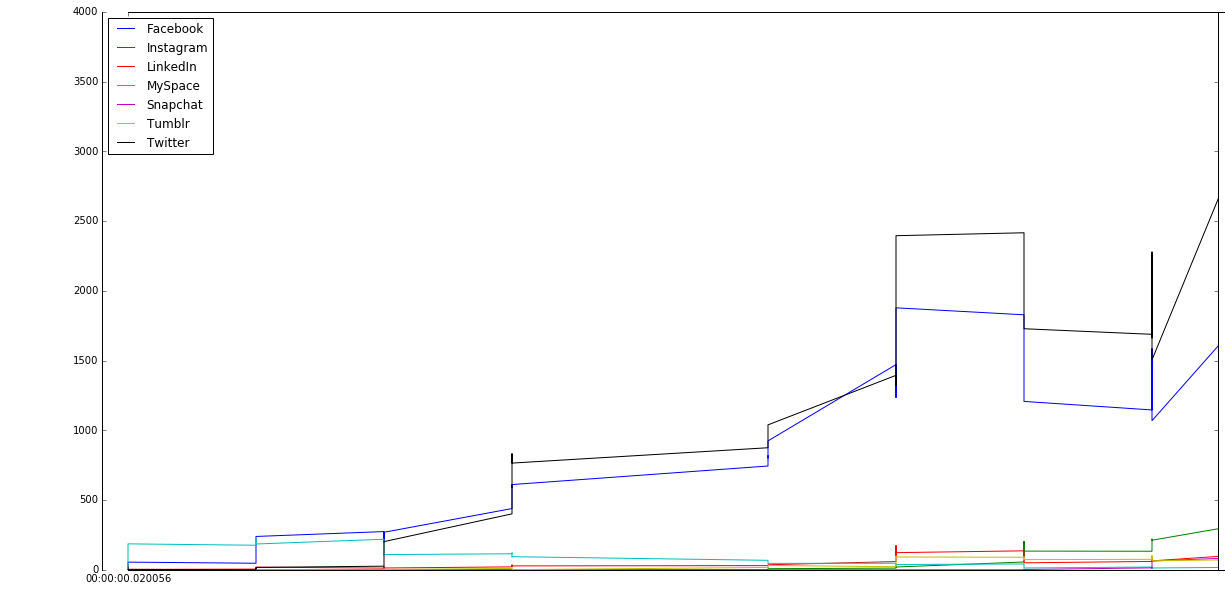

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
for sitename, selection in social_dfcsv.groupby('social_site'):
    ax.plot(selection['full_startdate'], selection['hits'],label=sitename)
    
ax.legend(loc=2)
plt.savefig("socialmediaovertimewithquarters")